In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA, KernelPCA
import itertools

In [3]:
data_new = pd.read_csv('raw_new.csv', sep=',',engine='python')
x = data_new[['INSUL','TAAV','RH','dayav_ta','dayav_rh']]
# raw y without rounding 
y = data_new[['ASH']]
y = y.round()
tmax = x['TAAV'].max()
tmin = x['TAAV'].min()

In [4]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(x)
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            best_n = n_components
            best_cov = cv_type

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
best_n

4

In [5]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='diag')

In [6]:
train = gmm.fit(x)
cluster = gmm.predict(x)
np.unique(cluster)

array([0, 1, 2, 3])

In [7]:
# get the features of each cluster
index0, = np.where(cluster == 0)
index1, = np.where(cluster == 1)
index2, = np.where(cluster == 2)
index3, = np.where(cluster == 3)
x0 = x.iloc[index0.tolist()]
x1 = x.iloc[index1.tolist()]
x2 = x.iloc[index2.tolist()]
x3 = x.iloc[index3.tolist()]
# get the sensation of each cluster
y0 = y.iloc[index0.tolist()]
y1 = y.iloc[index1.tolist()]
y2 = y.iloc[index2.tolist()]
y3 = y.iloc[index3.tolist()]

In [8]:
print('INSUL','TAAV','RH','dayav_ta','dayav_rh')
gmm.means_

INSUL TAAV RH dayav_ta dayav_rh


array([[  0.6954912 ,  25.19710067,  61.13575618,  27.71474567,
         81.37292335],
       [  0.83867252,  22.56677332,  36.3580453 ,  10.52757788,
         74.66025282],
       [  0.72030727,  23.67716597,  56.87519714,  21.32177195,
         73.18142548],
       [  0.76932536,  22.63417043,  57.23829379,  21.71930332,
         52.16329476]])

In [9]:
gmm.covariances_

array([[  1.50498686e-02,   5.30829396e+00,   5.01207025e+01,
          5.33701744e-02,   6.60370166e-02],
       [  3.99383865e-02,   1.15802343e+00,   6.28298650e+01,
          1.76063356e+01,   2.68482281e+01],
       [  2.38924639e-02,   1.39118678e+00,   6.37438316e+01,
          1.10750216e+01,   5.42060617e+01],
       [  3.71035326e-02,   4.81230368e-01,   2.88683764e+01,
          1.34347969e+01,   4.37248546e+00]])

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [11]:
import seaborn as sns

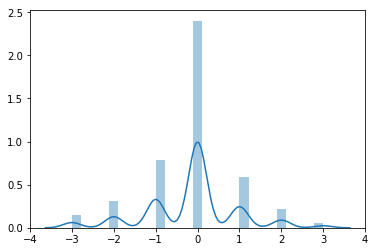

In [12]:
sns.distplot(y0)

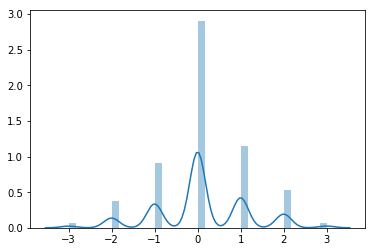

In [13]:
sns.distplot(y1)

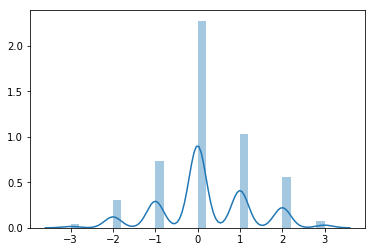

In [14]:
sns.distplot(y2)

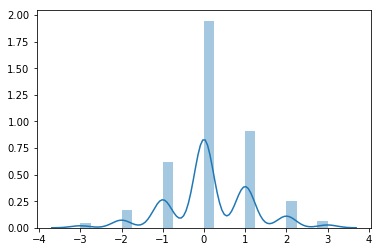

In [15]:
sns.distplot(y3)

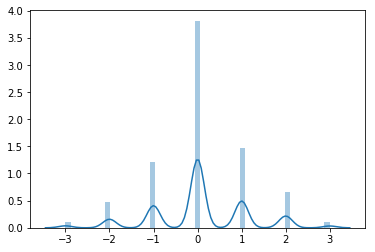

In [16]:
sns.distplot(y)

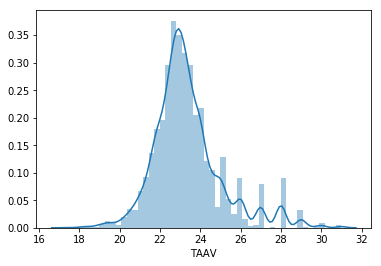

In [17]:
sns.distplot(x['TAAV'])